In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

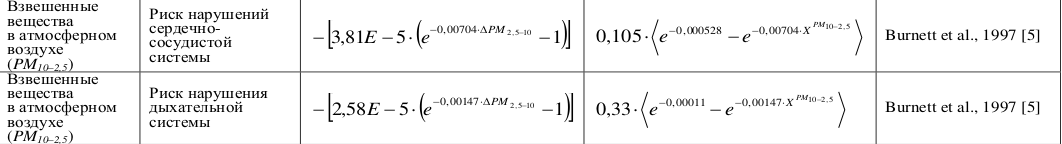

In [2]:
def Kelly(x):
    
    # Cкобки Келли
    if x > 0:
        return x
    
    return 0.0

In [3]:
# Функции расчёта риска

# np.exp - экспонента

# Для СС
def get_delta_R_heart(x):
    return 0.105 * Kelly(np.exp(-0.000528) - np.exp(-0.00704 * x))

# Для ДС
def get_delta_R_lungs(x):
    return 0.33 * Kelly(np.exp(-0.00011) - np.exp(-0.00147 * x))

# Функция для ограничения риска. Передаём в неё вектор со значениями риска, на выходе значения вектора
# не больше 1
def clamp_probs(probs):
    return [1 if i > 1 else i for i in probs]

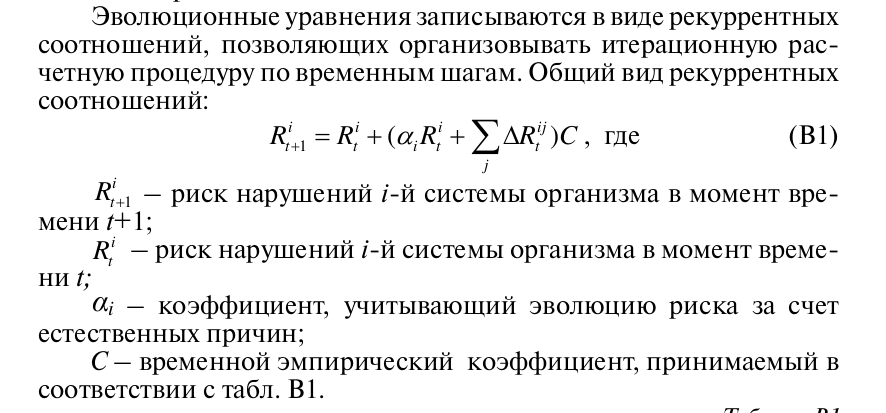

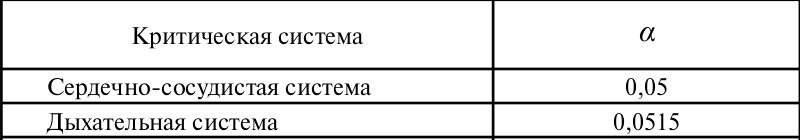

In [4]:
# Функция для рассчёта эволюции риска. Принимает Парную модель, коэффциент а и концентрацию с
def get_risk_evolution(delta_r_func, a, c):
    
    # динамический массив, в который будем складывать значения риска для разных t
    risk_values = []
    
    # задаём начальное условие
    R_i = 0.01
    
    # цикл по 120 годам
    for _ in range(120):
        
        R_i_next = R_i + (a * R_i + delta_r_func(c))
        risk_values.append(R_i)
        R_i = R_i_next
    
    return clamp_probs(risk_values)

In [43]:
heart_risk_one_step_fewer = get_risk_evolution(get_delta_R_heart, 0.05, 9.56)
heart_risk_one_step_mucher = get_risk_evolution(get_delta_R_heart, 0.05, 21)

In [44]:
heart_risk_one_step = get_risk_evolution(get_delta_R_heart, 0.05, 0.75)
lung_risk_one_step = get_risk_evolution(get_delta_R_lungs, 0.0515, 0.75)

heart_risk_two_step = get_risk_evolution(get_delta_R_heart, 0.05, 0.04)
lung_risk_two_step = get_risk_evolution(get_delta_R_lungs, 0.0515, 0.04)

heart_risk_no_step = get_risk_evolution(get_delta_R_heart, 0.05, 14.56)
lung_risk_no_step = get_risk_evolution(get_delta_R_lungs, 0.0515, 14.56)

#### Далее идет только построение графиков и я ничего не комментировал.

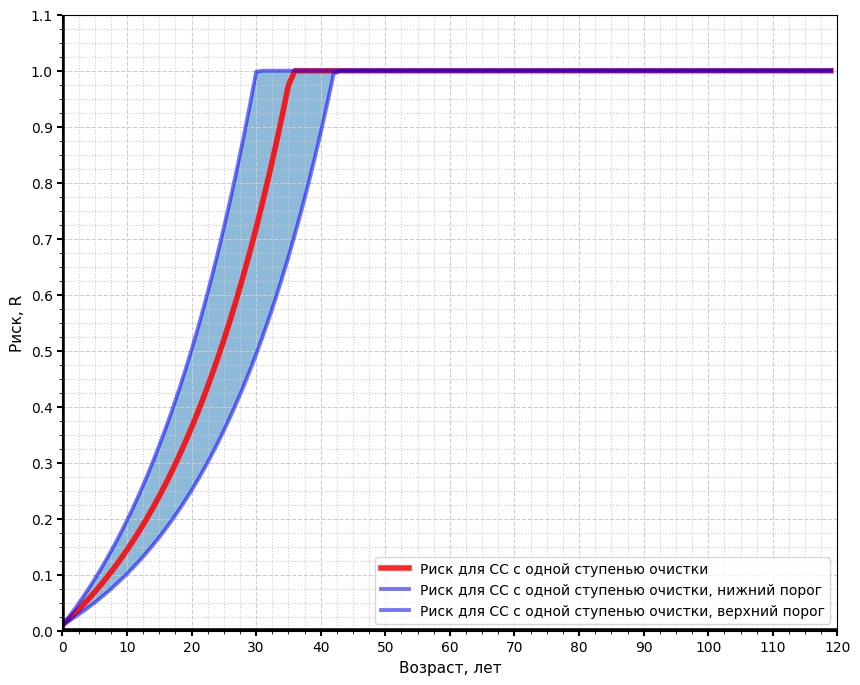

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.1)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

conditions = 'с одной ступенью очистки'
ax.plot(heart_risk_no_step, label=f'Риск для СС {conditions}', linewidth=4, c='r', alpha=0.85)#, linestyle='--', c='r')
ax.plot(heart_risk_one_step_fewer, label=f'Риск для СС {conditions}, нижний порог', linewidth=2.75, c='b', alpha=0.55)#, linestyle='--', c='r')
ax.plot(heart_risk_one_step_mucher, label=f'Риск для СС {conditions}, верхний порог', linewidth=2.75, c='b', alpha=0.55)#, linestyle='--', c='r')

ax.fill_between(range(120), heart_risk_one_step_fewer, heart_risk_one_step_mucher, alpha=0.5)

ax.legend(loc='lower right')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)

ax.axvline(0, linewidth=4, color='black')
ax.axhline(0, linewidth=4, color='black')

ax.yaxis.set_tick_params(width=1.5)
ax.xaxis.set_tick_params(width=1.5)

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

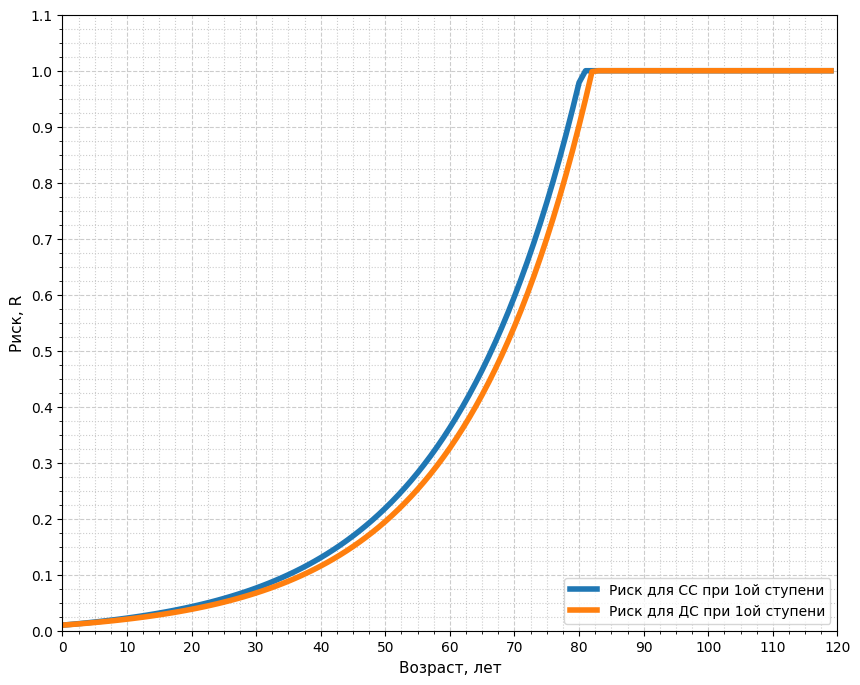

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))


# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.1)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.plot(heart_risk_one_step, label='Риск для СС при 1ой ступени', linewidth=4)
ax.plot(lung_risk_one_step, label='Риск для ДС при 1ой ступени', linewidth=4)


ax.legend(loc='lower right')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)
# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.1)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))


ax.plot(heart_risk_two_step, label='Риск для СС при базовых условиях', linewidth=4)#, linestyle='--', c='r')
ax.plot(lung_risk_two_step, label='Риск для ДС при базовых условиях', linewidth=4)

ax.legend(loc='lower right')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)
# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

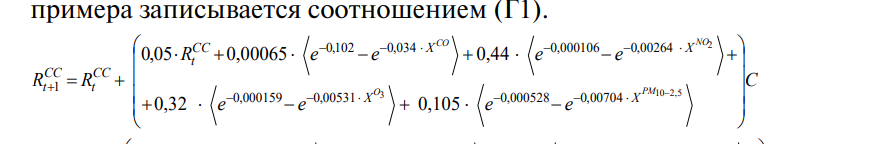

In [ ]:
def get_delta_test():
    
    kelly = torch.nn.ReLU()
    
    first = 0.00065 * kelly(torch.exp(torch.tensor(-0.102)) - torch.exp(torch.tensor(-0.034 * 4.5)))
    sec = 0.44 * kelly(torch.exp(torch.tensor(-0.000159)) - torch.exp(torch.tensor(-0.00531 * 0.055)))
    third = 0.105 * kelly(torch.exp(torch.tensor(-0.000528)) - torch.exp(torch.tensor(-0.00704 * o3)))
    
    return first + sec + third

In [ ]:
def get_risk_evolution(delta_r_func, a, c):
    risk_values = []
    
    R_i = torch.tensor(0.0)
    
    for _ in range(120):
        R_i_next = R_i + (a * R_i + delta_r_func(c))
        risk_values.append(R_i.item())
        R_i = R_i_next
    
    return clamp_probs(risk_values)

In [7]:
def get_true_risk(R):
    risk_one, risk_two = np.array(R)
    return 1 - ((1 - risk_one) * (1 - risk_two))

In [8]:
risks_true_no_step = get_true_risk([heart_risk_no_step, lung_risk_no_step])
risks_true_one_step = get_true_risk([heart_risk_one_step, lung_risk_one_step])
risks_true_two_step = get_true_risk([heart_risk_two_step, lung_risk_two_step])

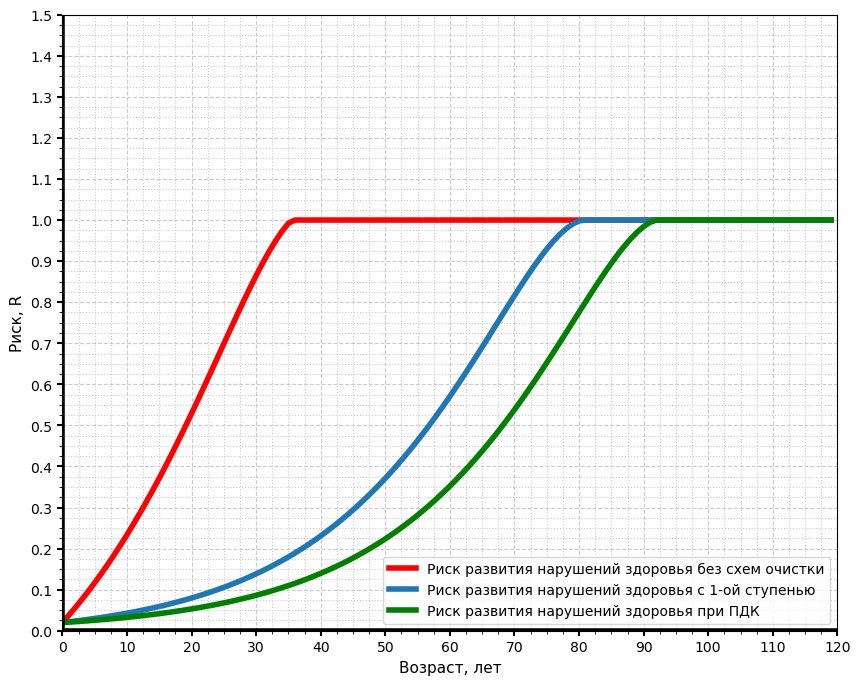

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.5)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.plot(risks_true_no_step, label='Риск развития нарушений здоровья без схем очистки', linewidth=4, c='r')
ax.plot(risks_true_one_step, label='Риск развития нарушений здоровья с 1-ой ступенью', linewidth=4)
ax.plot(risks_true_two_step, label='Риск развития нарушений здоровья при ПДК', linewidth=4, c='g')

ax.legend(loc='lower right')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)

ax.axvline(0, linewidth=4, color='black')
ax.axhline(0, linewidth=4, color='black')
ax.yaxis.set_tick_params(width=1.5)
ax.xaxis.set_tick_params(width=1.5)

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

In [1]:
92 - 35

57

In [85]:
def calc_delta_r(r_one, r_two):
    
    unclamped_r = np.array(r_one) - np.array(r_two)
    max_delta = np.argmax(unclamped_r)
    clamped_r = np.hstack([unclamped_r[:max_delta], np.full(120 - max_delta, unclamped_r[max_delta])])
    
    return clamped_r

delta_r_no_step = calc_delta_r(risks_true_no_step, risks_true_two_step)
delta_r_one_step = calc_delta_r(risks_true_one_step, risks_true_two_step)

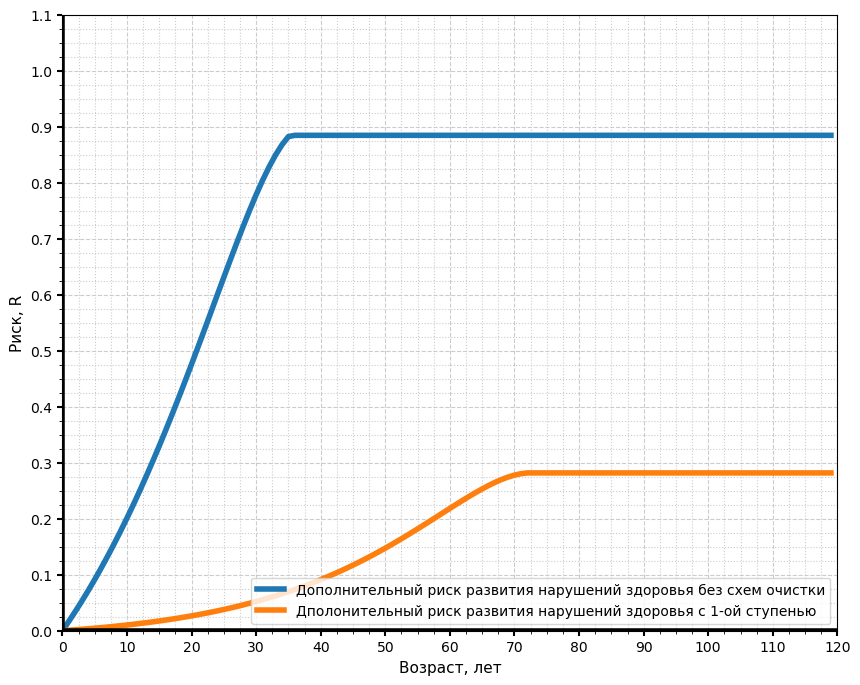

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.1)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.plot(delta_r_no_step, label='Дополнительный риск развития нарушений здоровья без схем очистки', linewidth=4)
ax.plot(delta_r_one_step, label='Дполонительный риск развития нарушений здоровья с 1-ой ступенью', linewidth=4)

ax.legend(loc='lower right')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)

ax.axvline(0, linewidth=4, color='black')
ax.axhline(0, linewidth=4, color='black')
ax.yaxis.set_tick_params(width=1.5)
ax.xaxis.set_tick_params(width=1.5)

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

In [89]:
r_leaded_no_step = delta_r_no_step / (1 - risks_true_two_step)
r_leaded_one_step = delta_r_one_step / (1 - risks_true_two_step)

r_leaded_no_step = [1 if i > 1 else i for i in r_leaded_no_step]
r_leaded_one_step = [1 if i > 1 else i for i in r_leaded_one_step]

/tmp/ipykernel_9350/1986919811.py:1: RuntimeWarning: divide by zero encountered in divide
  r_leaded_no_step = delta_r_no_step / (1 - risks_true_two_step)
/tmp/ipykernel_9350/1986919811.py:2: RuntimeWarning: divide by zero encountered in divide
  r_leaded_one_step = delta_r_one_step / (1 - risks_true_two_step)


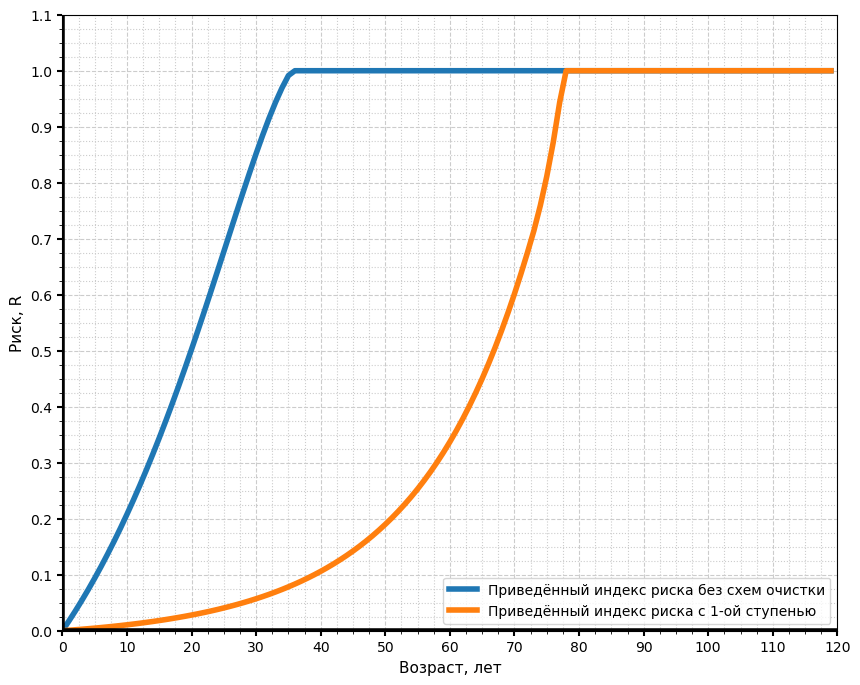

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.1)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.plot(r_leaded_no_step, label='Приведённый индекс риска без схем очистки', linewidth=4)
ax.plot(r_leaded_one_step, label='Приведённый индекс риска с 1-ой ступенью', linewidth=4)

ax.legend(loc='lower right')
ax.set_xlabel('Возраст, лет')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)

ax.axvline(0, linewidth=4, color='black')
ax.axhline(0, linewidth=4, color='black')
ax.yaxis.set_tick_params(width=1.5)
ax.xaxis.set_tick_params(width=1.5)

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

In [92]:
years = [i for i in range(10, 80, 10)]

for y in years:
    print(r_leaded_no_step[y])

print()
    
for y in years:
    print(r_leaded_one_step[y])

0.20797250342979628
0.5027091050244604
0.8521669874293687
1
1
1
1

0.01055014774052112
0.028013289243212534
0.057109975979065676
0.10610780390669716
0.19001829450073005
0.3373229415264603
0.6017724492488671


In [93]:
years = [i for i in range(10, 80, 10)]

for y in years:
    print(delta_r_no_step[y])

print()
    
for y in years:
    print(delta_r_one_step[y])

0.20120446490953658
0.47601021051946624
0.7785565128844344
0.8846407576440982
0.8846407576440982
0.8846407576440982
0.8846407576440982

0.010206814823309873
0.026525502674862977
0.05217679680751597
0.09128567283636047
0.1475094377397138
0.21849191318305716
0.2778994498219929


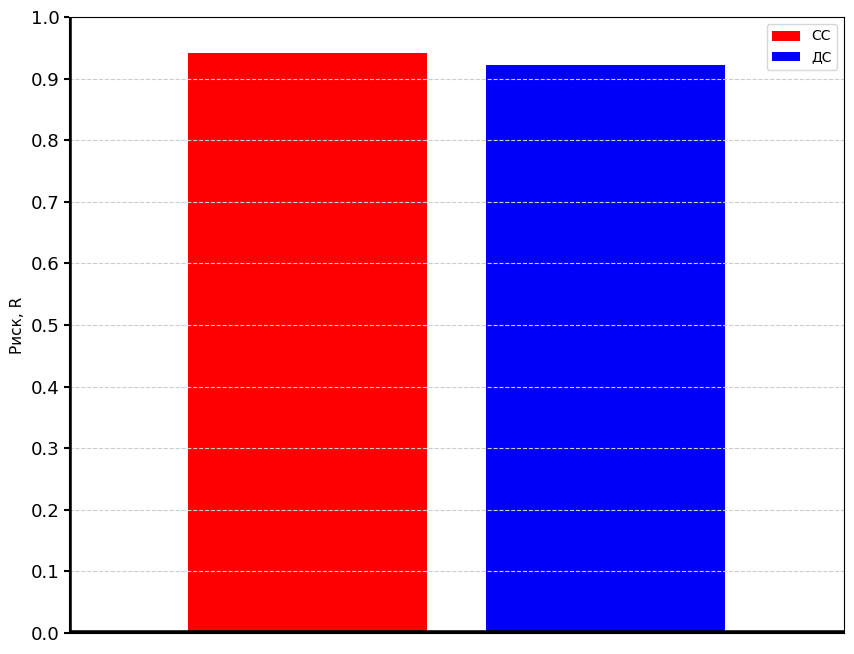

In [119]:
# delta_r_heart_no_step = calc_delta_r(heart_risk_no_step, heart_risk_two_step)
delta_r_lung_no_step = calc_delta_r(lung_risk_no_step, lung_risk_two_step)

delta_r_heart_one_step = calc_delta_r(heart_risk_no_step, heart_risk_two_step)
delta_r_lung_one_step = calc_delta_r(lung_risk_no_step, lung_risk_two_step)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0.2, 2.8)
ax.set_ylim(0, 1)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(0.025))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.025))

ax.bar(1, delta_r_heart_one_step[60], color='#FF0000', label='СС')
ax.bar(2, delta_r_lung_one_step[60], color='#0000FA', label='ДС')
ax.legend()

ax.set_xlabel('')
ax.set_ylabel('Риск, R')
ax.xaxis.label.set_size(11)
ax.yaxis.label.set_size(11)
# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
ax.axvline(0.20, linewidth=4, color='black')
ax.axhline(0, linewidth=4, color='black')
ax.yaxis.set_tick_params(width=1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.set_xticks([])
# ax.set_xlabel('Структура дополнительного риска в 20 лет \n Сценарий без использования схем очистки')
ax.tick_params(labelsize=13)